In [2]:
# Importing libraries

import numpy as np    # linear algebra
import pandas as pd   # data processing
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

### DATAFRAME CREATION

In [13]:
# Reading the data files
with open('dataset/adult.data','r') as adult_data:
    row_data = adult_data.readlines()

# Creating an array to store the data by rows in order to change it to differnt columns
data_rows = []
#Arranging the data columns doing necessary splittings
for data_row in row_data:
    data_rows.append(data_row)

# Splitting the dataset to necessary columns
adult_data_array = []
for data_row in data_rows:
    adult_data_array.append(data_row.split(','))

### DATASET ANALYSIS

In [9]:
# Reading the dataset
adult_data = pd.read_csv('dataset/adult.data', header=None)
# displaying the head of the dataset
adult_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                'hours-per-week', 'native-country', 'income']
adult_data.columns = column_names
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# Number of instances and attributes
adult_data.shape

(32561, 15)

In [12]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Sum of the missing cells of each attribute
adult_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

### EXPLORATORY DATA ANALYSIS

In [13]:
# Categorical variables
cat_cols = []
for col in adult_data.columns:
    if adult_data[col].dtype == 'O':
        cat_cols.append(col)

In [14]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [15]:
# education-num column should also be categorical so we will add it
cat_cols.append('education-num')

In [16]:
adult_data[cat_cols]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,education-num
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,13
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,13
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,9
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,7
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,13
...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,12
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,9
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,9
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,9


In [17]:
# We have an imbalanced dataset
for col in cat_cols:
    print(adult_data[col].value_counts())
    print()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

occupation
 Prof-specialty       4140
 Craft-repa

In [18]:
# Numerical columns
num_cols = set(adult_data.columns).difference(cat_cols)

In [19]:
num_cols = list(num_cols)
num_cols

['capital-gain', 'hours-per-week', 'age', 'capital-loss', 'fnlwgt']

<Figure size 1000x3000 with 0 Axes>

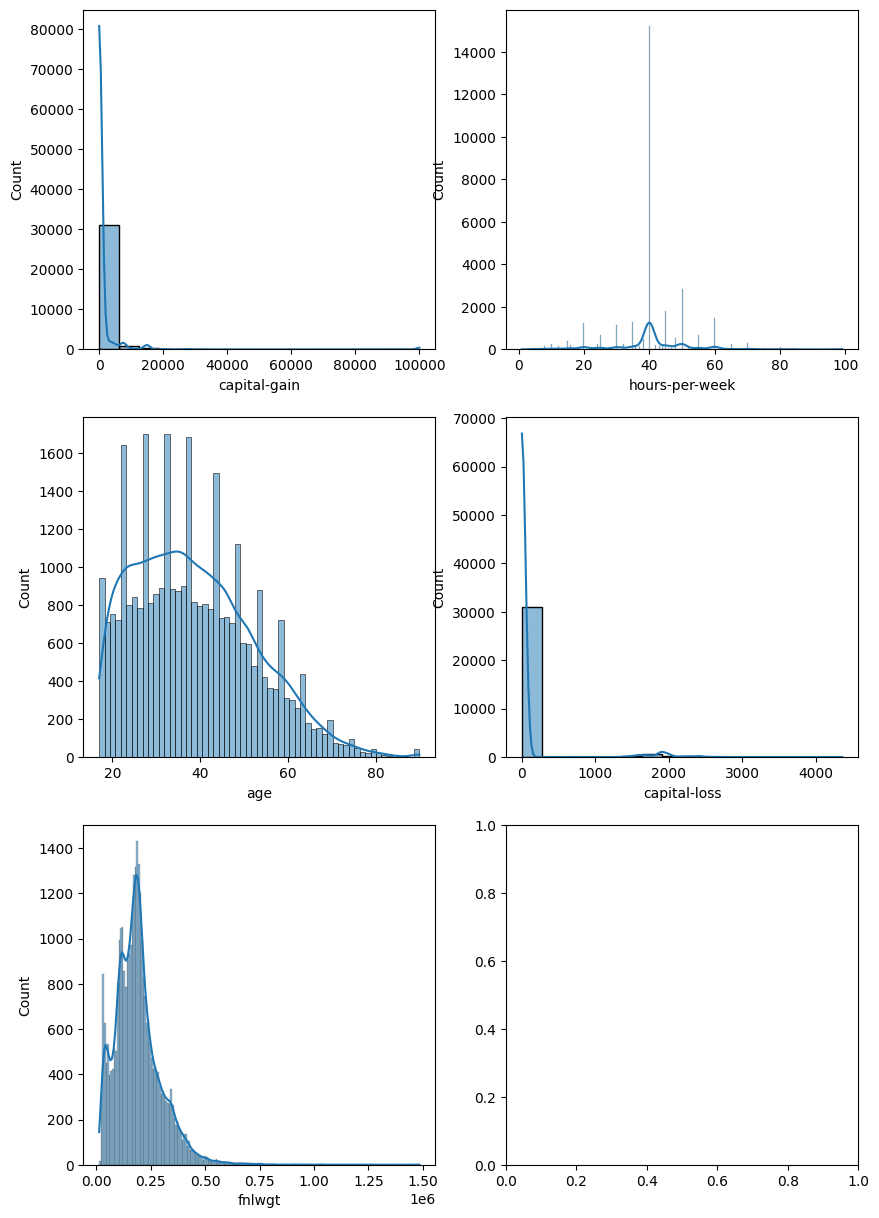

In [20]:
plt.figure(figsize = (10, 30))

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))

axes = axes.flatten()

for i,col in enumerate(num_cols):
    sns.histplot(adult_data[col], kde = True, ax = axes[i])
    
plt.show()